## Uncomment this cell to install package dependencies

In [1]:
# !pip install -r requirements.txt

# Breast Cancer data processing

In [2]:
# Loading all libraries needed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import random

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
sns.set_palette(['#06B1F0', '#FC4B60'])
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')


In [3]:
columns = ['Sample code number', 'Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape', 'Marginal Adhesion',
          'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin', 'Normal Nucleoli', 'Mitoses', 'Class']

In [4]:
data = pd.read_table('data/breast-cancer-wisconsin.data.txt', delimiter=',', header=None)
data.columns = columns

In [5]:
print (data.shape)
data.head()

(699, 11)


,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


The target label has two classes 1) label 2 is benign which is no breast cancer 2) label 4 is malignant which means the patient has breast cancer. For model training and evaluation, the patients with no breast cancer have been labelled as 0 and with breast cancer as 1

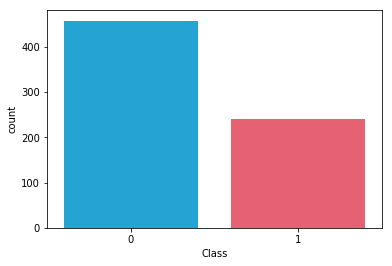

In [6]:
data['Class'] = data['Class'].apply(lambda x: 1 if x == 4 else 0)
sns.countplot(data['Class'])
plt.show()

The data is imbalanced, but its not very terrible.For the purpose of this analysis, the dataset needs to be very imbalanced. Hence only 5% of the positive instances will be used from original dataset

In [7]:
# seperating class 0 from 1
data_m = data[data['Class'] == 1]
data_b = data[data['Class'] == 0]
print (data_m.shape)
print (data_b.shape)

(241, 11)
(458, 11)


In [8]:
# sampling from positive instances and appending to class 0 data
random.seed(0)
data_m_sample = data_m.sample(12, replace=False)
new_data = pd.concat([data_b, data_m_sample])
print (new_data.shape)

(470, 11)


In [9]:
def data_check(df, column_list):
    """
    Function to perform data cleaning i.e
    dropping rows and columns with invalid entries
    and converting the dtypes of the columns to be sklearn friendly
    
    parameters: pandas dataframe, list of columns that need to be dropped
    returns: processed dataframe
    """
    for col in column_list:
        df.drop(col, axis=1, inplace=True)
    df.dropna(inplace=True)
    cols_to_process = []
    for indx, dt in enumerate(df.dtypes):
        if dt != int:
            cols_to_process.append(df.dtypes.index[indx])
    for col in cols_to_process:
        invalid_inputs = set()
        for val in df[col]:
            try:
                int(val)
            except:
                invalid_inputs.add(val)
        if invalid_inputs:
            print (col)
            print ('invalid input: {}'.format(invalid_inputs))       
        for iv in invalid_inputs:
            df = df[df[col] != iv]
        df[col] = df[col].astype(int)
        
    return df     

In [10]:
new_data = data_check(new_data, ['Sample code number'])

Bare Nuclei
invalid input: {'?'}


Uncomment the cell below to overwrite preprocessed data

In [11]:
#new_data.to_csv('data/data_updated.csv')